<a href="https://colab.research.google.com/github/Mansoor772/FYP_object-detection-using-yolov8/blob/main/Dynamic_WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from ast import Index
import pandas as pd
weather=pd.read_csv("/content/seattle-weather.csv" ,index_col="date")
print(weather)
#

            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain
...                   ...       ...       ...   ...      ...
2015-12-27            8.6       4.4       1.7   2.9     rain
2015-12-28            1.5       5.0       1.7   1.3     rain
2015-12-29            0.0       7.2       0.6   2.6      fog
2015-12-30            0.0       5.6      -1.0   3.4      sun
2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]


In [6]:
weather.loc["2012-01-01",:]

,2012-01-01
precipitation,0.0
temp_max,12.8
temp_min,5.0
wind,4.7
weather,drizzle


In [10]:
weather.loc["2012-01-01" :"2012-01-20" :,]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
2012-01-07,0.0,7.2,2.8,2.3,rain
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-09,4.3,9.4,5.0,3.4,rain


In [11]:
weather.apply(pd.isnull).sum()

,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [12]:
del weather ["wind"]
del weather ["weather"]

In [13]:
weather

,precipitation,temp_max,temp_min
date,,,
2012-01-01,0.0,12.8,5.0
2012-01-02,10.9,10.6,2.8
2012-01-03,0.8,11.7,7.2
2012-01-04,20.3,12.2,5.6
2012-01-05,1.3,8.9,2.8
...,...,...,...
2015-12-27,8.6,4.4,1.7
2015-12-28,1.5,5.0,1.7
2015-12-29,0.0,7.2,0.6


In [14]:
weather.dtypes

,0
precipitation,float64
temp_max,float64
temp_min,float64


In [15]:
weather.index

Index(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
       '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
       ...
       '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
       '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', name='date', length=1461)

In [16]:
weather.index=pd.to_datetime(weather.index)

In [17]:
weather.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)

In [26]:
print(weather.index.year, weather.index.month, weather.index.day)

Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       ...
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
      dtype='int32', name='date', length=1461) Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='date', length=1461) Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int32', name='date', length=1461)


<Axes: xlabel='date'>

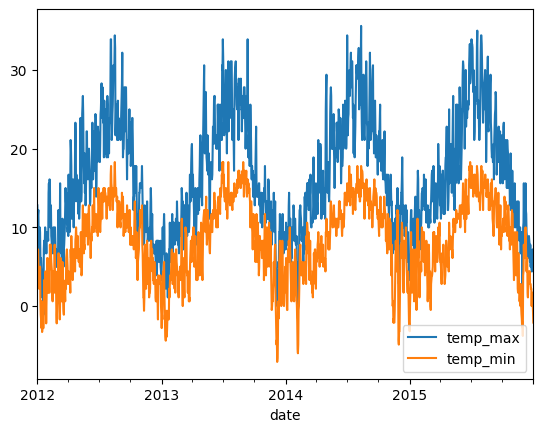

In [27]:
weather[["temp_max" ,"temp_min"]].plot()

<Axes: xlabel='date'>

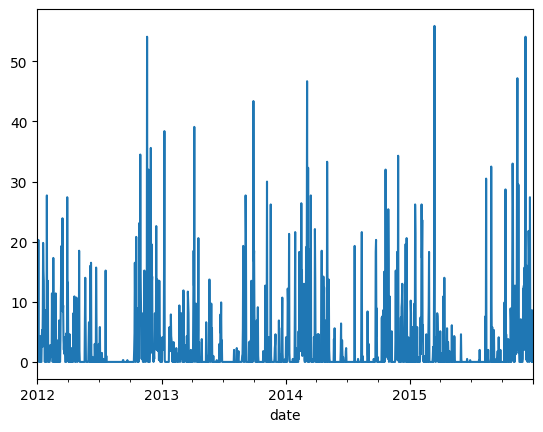

In [28]:
weather['precipitation'].plot()

In [29]:
weather["target"]=weather.shift(-1)["temp_max"]

In [33]:
weather

,precipitation,temp_max,temp_min,target
date,,,,
2012-01-01,0.0,12.8,5.0,10.6
2012-01-02,10.9,10.6,2.8,11.7
2012-01-03,0.8,11.7,7.2,12.2
2012-01-04,20.3,12.2,5.6,8.9
2012-01-05,1.3,8.9,2.8,4.4
...,...,...,...,...
2015-12-25,5.8,5.0,2.2,4.4
2015-12-26,0.0,4.4,0.0,4.4
2015-12-27,8.6,4.4,1.7,5.0


from matplotlib import pyplot as plt
weather['precipitation'].plot(kind='hist', bins=20, title='precipitation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather['temp_max'].plot(kind='hist', bins=20, title='temp_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather['temp_min'].plot(kind='hist', bins=20, title='temp_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather.plot(kind='scatter', x='precipitation', y='temp_max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather.plot(kind='scatter', x='temp_max', y='temp_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather.plot(kind='scatter', x='temp_min', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
weather['precipitation'].plot(kind='line', figsize=(8, 4), title='precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
weather['temp_max'].plot(kind='line', figsize=(8, 4), title='temp_max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
weather['temp_min'].plot(kind='line', figsize=(8, 4), title='temp_min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
weather['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

In [32]:
weather=weather.iloc[:-1,:].copy()

In [34]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=.1)


In [35]:
predictors=["temp_max","temp_min","precipitation"]
#target="target"

In [36]:
train=weather.loc[:"2014-12-31"]
test=weather.loc["2015-01-01":]

In [37]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [38]:
predictions=reg.predict(test[predictors])

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target"],predictions)

2.2174428384414657

In [44]:
combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
combined.columns=["actual","predictions"]

In [45]:
combined

,actual,predictions
date,,
2015-01-01,5.6,5.607035
2015-01-02,5.0,6.221997
2015-01-03,10.6,6.207025
2015-01-04,12.2,10.366928
2015-01-05,12.2,13.063830
...,...,...
2015-12-25,4.4,5.995062
2015-12-26,4.4,5.367420
2015-12-27,5.0,5.262224


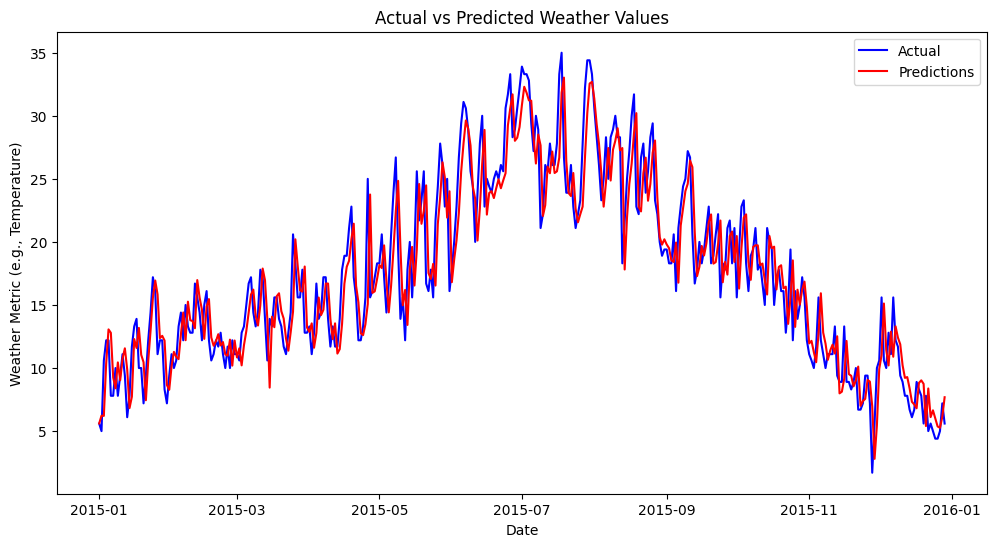

In [46]:
import matplotlib.pyplot as plt

# Plot actual vs predictions
plt.figure(figsize=(12, 6))
plt.plot(combined.index, combined['actual'], label='Actual', color='b')
plt.plot(combined.index, combined['predictions'], label='Predictions', color='r')
plt.xlabel('Date')
plt.ylabel('Weather Metric (e.g., Temperature)')
plt.title('Actual vs Predicted Weather Values')
plt.legend()
plt.show()


In [43]:
reg.coef_

array([ 0.78133373,  0.21812054, -0.0553489 ])

In [52]:
import pandas as pd

# Generate future dates (e.g., next 30 days)
future_dates = pd.date_range(start='2023-12-30', periods=30, freq='D')

# Display the generated dates
print(future_dates)


DatetimeIndex(['2023-12-30', '2023-12-31', '2024-01-01', '2024-01-02',
               '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06',
               '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-13', '2024-01-14',
               '2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18',
               '2024-01-19', '2024-01-20', '2024-01-21', '2024-01-22',
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26',
               '2024-01-27', '2024-01-28'],
              dtype='datetime64[ns]', freq='D')


In [53]:
future_dates_df = pd.DataFrame(future_dates, columns=["date"])
print(future_dates_df)


         date
0  2023-12-30
1  2023-12-31
2  2024-01-01
3  2024-01-02
4  2024-01-03
5  2024-01-04
6  2024-01-05
7  2024-01-06
8  2024-01-07
9  2024-01-08
10 2024-01-09
11 2024-01-10
12 2024-01-11
13 2024-01-12
14 2024-01-13
15 2024-01-14
16 2024-01-15
17 2024-01-16
18 2024-01-17
19 2024-01-18
20 2024-01-19
21 2024-01-20
22 2024-01-21
23 2024-01-22
24 2024-01-23
25 2024-01-24
26 2024-01-25
27 2024-01-26
28 2024-01-27
29 2024-01-28


In [58]:
# Convert columns to numeric
future_features['temp_max'] = pd.to_numeric(future_features['temp_max'], errors='coerce')
future_features['temp_min'] = pd.to_numeric(future_features['temp_min'], errors='coerce')
future_features['precipitation'] = pd.to_numeric(future_features['precipitation'], errors='coerce')

# Verify the conversion
print(future_features.dtypes)


temp_max         float64
temp_min         float64
precipitation    float64
dtype: object


In [59]:
# Replace ... with actual numbers for a 30-day period
future_features = pd.DataFrame({
    'temp_max': [10, 11, 9, 12, 13, 11, 10, 10, 9, 12, 11, 13, 10, 9, 8, 10, 11, 9, 12, 13, 11, 10, 10, 9, 12, 11, 13, 10, 9, 8],
    'temp_min': [2, 3, 1, 4, 5, 3, 2, 2, 1, 4, 3, 5, 2, 1, 0, 2, 3, 1, 4, 5, 3, 2, 2, 1, 4, 3, 5, 2, 1, 0],
    'precipitation': [0.2, 0.0, 0.1, 0.3, 0.0, 0.0, 0.2, 0.1, 0.0, 0.3, 0.1, 0.0, 0.2, 0.1, 0.0, 0.3, 0.1, 0.0, 0.2, 0.3, 0.1, 0.0, 0.2, 0.1, 0.0, 0.3, 0.1, 0.0, 0.2, 0.1]
}, index=future_dates)

# Make predictions
future_predictions = reg.predict(future_features)

# Add predictions to the DataFrame
future_dates_df = pd.DataFrame(future_dates, columns=["date"])
future_dates_df['predictions'] = future_predictions

# Display the DataFrame with dates and predictions
print(future_dates_df)


         date  predictions
0  2023-12-30    10.168060
1  2023-12-31    11.178584
2  2024-01-01     9.174141
3  2024-01-02    12.161434
4  2024-01-03    13.177493
5  2024-01-04    11.178584
6  2024-01-05    10.168060
7  2024-01-06    10.173595
8  2024-01-07     9.179676
9  2024-01-08    12.161434
10 2024-01-09    11.173049
11 2024-01-10    13.177493
12 2024-01-11    10.168060
13 2024-01-12     9.174141
14 2024-01-13     8.180221
15 2024-01-14    10.162525
16 2024-01-15    11.173049
17 2024-01-16     9.179676
18 2024-01-17    12.166969
19 2024-01-18    13.160888
20 2024-01-19    11.173049
21 2024-01-20    10.179130
22 2024-01-21    10.168060
23 2024-01-22     9.174141
24 2024-01-23    12.178039
25 2024-01-24    11.161980
26 2024-01-25    13.171958
27 2024-01-26    10.179130
28 2024-01-27     9.168606
29 2024-01-28     8.174687


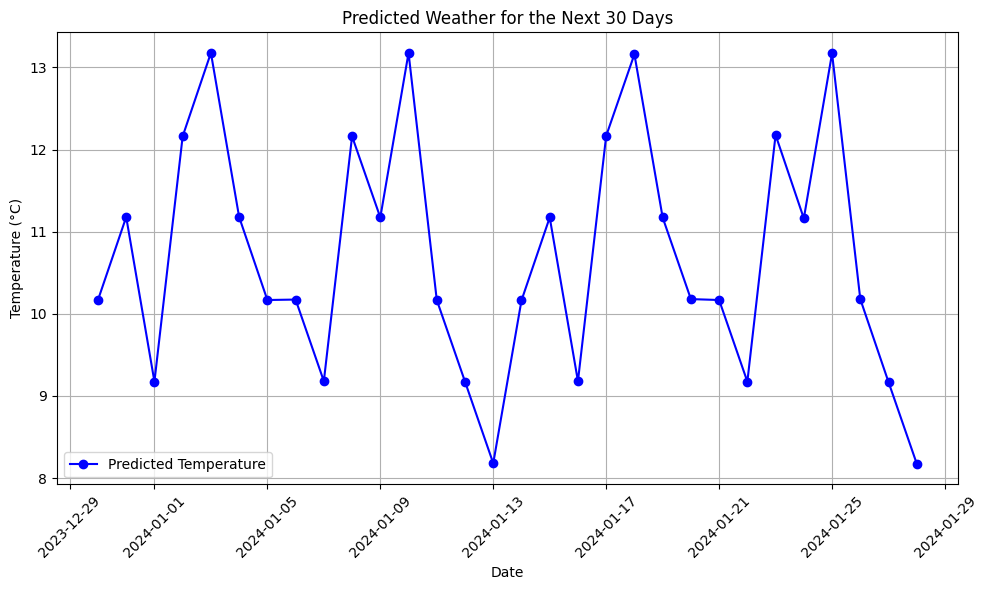

In [60]:
import matplotlib.pyplot as plt

# Plotting the predicted temperatures
plt.figure(figsize=(10, 6))
plt.plot(future_dates_df['date'], future_dates_df['predictions'], marker='o', linestyle='-', color='b', label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Predicted Weather for the Next 30 Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
# Example: Alert if temperature is above 30°C
high_temp_alert = future_dates_df[future_dates_df['predictions'] > 30]
if not high_temp_alert.empty:
    print("Alert: High temperature forecasted for the following days:")
    print(high_temp_alert)


In [62]:
# Install necessary libraries
!pip install ipywidgets matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatText

# Simulate a trained model (use your actual model here)
from sklearn.linear_model import LinearRegression

# Dummy data for training (replace with your actual training data)
data = {
    'temp_max': [10, 12, 14, 13, 15, 16, 17, 18, 19, 20],
    'temp_min': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'precipitation': [0.1, 0.2, 0.3, 0.0, 0.4, 0.1, 0.0, 0.2, 0.3, 0.4],
    'target': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]  # This is the target variable (predicted temp)
}

df = pd.DataFrame(data)

# Train a simple model
reg = LinearRegression()
reg.fit(df[['temp_max', 'temp_min', 'precipitation']], df['target'])

# Function to predict and plot the result
def predict_weather(temp_max, temp_min, precipitation):
    # Prepare the input for prediction
    future_features = pd.DataFrame({
        'temp_max': [temp_max],
        'temp_min': [temp_min],
        'precipitation': [precipitation]
    })

    # Make the prediction
    prediction = reg.predict(future_features)[0]

    # Display the prediction
    print(f"Predicted Temperature: {prediction:.2f}°C")

    # Create a plot for visualizing the prediction
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot([0, 1], [prediction, prediction], label='Predicted Temperature', color='blue')
    ax.set_title('Predicted Temperature for the Next Day')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()

    # Show the plot
    plt.show()

# Interactive input using widgets
interact(predict_weather,
         temp_max=FloatText(value=12.0, description="Max Temp (°C):", step=0.1),
         temp_min=FloatText(value=6.0, description="Min Temp (°C):", step=0.1),
         precipitation=FloatText(value=0.1, description="Precipitation (mm):", step=0.1))


interactive(children=(FloatText(value=12.0, description='Max Temp (°C):', step=0.1), FloatText(value=6.0, desc…

<function __main__.predict_weather(temp_max, temp_min, precipitation)>